<a href="https://colab.research.google.com/github/Peshniwah1/AI_Modelling_MUK/blob/main/A_machine_learning_model_to_predict_the_likelihood_of_death_from_rabies_infection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/sample_data/general_info.csv')


In [ ]:
data = pd.read_csv('/content/sample_data/rabies_bite.csv')

In [ ]:

# Reading the dataset

# General_info Dataset
Generalinfo = pd.read_csv('/content/sample_data/general_info.csv')

# rabies_bite Dataset
RabiesBites = pd.read_csv('/content/sample_data/rabies_bite.csv')


In [ ]:
# merge the two dataframes on columns 'Month' and 'District'
Rabies_df = pd.merge(RabiesBites, Generalinfo, on =['Month','District'], how = 'left')

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
Rabies_df.tail()

,District,Month,Suspected cases in animals,Suspected bites by animals,Deaths,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
1224,NTUNGAMO,31-Dec-02,4,2,0,0,20,3,0,1.0,2.0,2.0
1225,MUBENDE,31-Dec-02,0,0,0,0,43,4,0,3.0,2.0,3.0
1226,MASINDI,31-Dec-02,1,2,0,0,72,2,1,2.0,2.0,2.0
1227,WAKISO,31-Dec-02,8,0,0,0,163,26,5,3.0,2.0,3.0
1228,BUGIRI,31-Dec-02,1,1,0,1,0,0,0,3.0,2.0,3.0


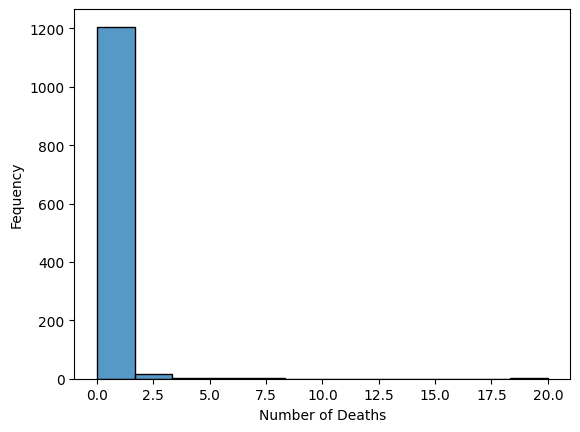

In [ ]:

# Plotting the histogram using seaborn
sns.histplot(data=Rabies_df, x='Deaths')

# Adding labels and title
plt.xlabel('Number of Deaths')
plt.ylabel('Fequency')

# Display the Histogram plot
plt.show()

In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
Rabies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   District                    1229 non-null   object 
 1   Month                       1229 non-null   object 
 2   Suspected cases in animals  1229 non-null   int64  
 3   Suspected bites by animals  1229 non-null   int64  
 4   Deaths                      1229 non-null   int64  
 5   Emergency vaccinations      1229 non-null   int64  
 6   Dogs                        1229 non-null   int64  
 7   Cats                        1229 non-null   int64  
 8   Pets destroyed              1229 non-null   int64  
 9   Rainfall                    1186 non-null   float64
 10  Water                       1186 non-null   float64
 11  Grazing                     1186 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 124.8+ KB


In [ ]:
# Looking at the descriptive statistics of the data
Rabies_df.describe(include='all')


,District,Month,Suspected cases in animals,Suspected bites by animals,Deaths,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
count,1229,1229,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1186.000000,1186.000000,1186.000000
unique,56,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARUA,31-Mar-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,61,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8.011391,7.529699,0.112286,5.074044,146.211554,7.298617,5.185517,2.574199,2.236088,2.427487
std,NaN,NaN,86.073192,11.425804,0.773389,16.968746,318.678267,26.655777,19.600649,1.393163,0.747370,1.146730
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000
50%,NaN,NaN,1.000000,3.000000,0.000000,0.000000,20.000000,0.000000,0.000000,3.000000,2.000000,3.000000
75%,NaN,NaN,7.000000,10.000000,0.000000,4.000000,132.000000,4.000000,2.000000,3.000000,3.000000,3.000000


In [28]:
# Looking at the descriptive statistics of the data
Rabies_df.describe(include='all')


NameError: ignored

In [ ]:
# Finding how many missing values are there for each column
Rabies_df.isnull().sum()


District                       0
Month                          0
Suspected cases in animals     0
Suspected bites by animals     0
Deaths                         0
Emergency vaccinations         0
Dogs                           0
Cats                           0
Pets destroyed                 0
Rainfall                      43
Water                         43
Grazing                       43
dtype: int64

In [29]:

# replace missing values with mode
Rabies_df['Rainfall'] = Rabies_df['Rainfall'].fillna(Rabies_df['Rainfall'].mode()[0])
Rabies_df['Water'] = Rabies_df['Water'].fillna(Rabies_df['Water'].mode()[0])
Rabies_df['Grazing'] = Rabies_df['Grazing'].fillna(Rabies_df['Grazing'].mode()[0])


NameError: ignored

In [ ]:

# Checking how many missing values are there for each column again
Rabies_df.isnull().sum()

NameError: ignored

In [ ]:

# Droping 'District' and 'Month' columns
# Rabies_df = Rabies_df.drop('District', axis=1)
Rabies_df = Rabies_df.drop('Month', axis=1)


NameError: ignored

<Axes: >

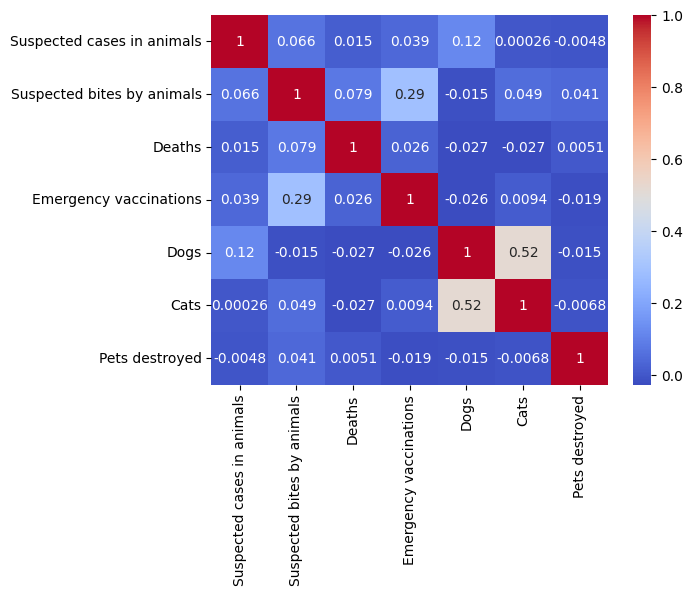

In [ ]:

# Convert any columns with string values to numeric values

# Rabies_df['District'] = pd.to_numeric(Rabies_df['District'], errors='coerce')
# Rabies_df['Month'] = pd.to_numeric(Rabies_df['Month'], errors='coerce')


# Calculate the correlation matrix

selected_columns = ['Suspected cases in animals','Suspected bites by animals','Deaths','Emergency vaccinations','Dogs','Cats','Pets destroyed']
corr_matrix  = Rabies_df[selected_columns].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define the mapping of categories to labels
district_labels = {
     'AMUDAT': 1,
    'BUGWERI': 2,
    'BULIISA': 3,
    'BULAMBULI': 4,
    'KOTIDO': 5,
    'IBANDA': 6,
    'IGANGA': 7,
    'KOBOKO': 8,
    'LUWERO': 9,
    'MBALE': 10,
    'MOROTO': 11,
    'MOYO': 12,
    'MUKONO': 13,
    'RAKAI': 14,
    'TORORO': 15,
    'NABILATUK': 16,
    'KYENJOJO': 17,
    'RUKUNGIRI': 18,
    'YUMBE': 19,
    'NAMUTUMBA': 21,
    'BUSIA': 22,
    'ABIM': 24,
    'KUMI': 25,
    'LUUKA': 26,
    'ARUA': 27,
    'KABERAMAIDO': 28,
    'KIBOGA': 29,
    'NAKAPIRIPIRITI': 30,  # Corrected label for 'NAKAPIRIPIRITI'
    'SEMBABULE': 31,
    'KAMULI': 32,
    'KIBAALE': 33,
    'LIRA': 34,
    'KAPCHORWA': 35,
    'MPIGI': 36,
    'KASESE': 37,
    'KITGUM': 38,
    'BUGIRI': 39,
    'JINJA': 40,
    'HOIMA': 41,
    'KANUNGU': 42,
    'BUSHENYI': 43,
    'MBARARA': 44,
    'NEBBI': 45,
    'KAYUNGA': 46,
    'KAMPALA': 47,
    'PADER': 48,
    'MUBENDE': 49,
    'MASINDI': 50,
    'RABIES': 51,
    'SOROTI': 52,
    'ADJUMANI': 53,
    'WAKISO': 54,
    'KABAROLE': 55,
    'BUNDIBUGYO': 56,
    'GULU': 57,
    'KALANGALA': 58,
    'NTUNGAMO': 59,
    'KATAKWI': 60,
    'MAYUGE': 61,
    'KAMWENGE': 62,
    'SIRONKO': 63,
    'KABALE': 64,
    'NAKASONGOLA': 65,
    'PALLISA': 66,
    'MASAKA': 67,
    'APAC': 68,
    'NAKASONGOLAQ': 69,  # Corrected label for 'NAKASONGOLAQ'
    'KISORO': 70
}


# Replace the values in 'District' column using the dictionary
Rabies_df['District'].replace(district_labels, inplace=True)
Rabies_df.head()
